In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from seaborn import pairplot
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score,accuracy_score,recall_score, f1_score
from sklearn.feature_selection import mutual_info_regression
from sklearn.svm import SVC
import pickle

In [2]:
# Male = 1, else 0

dataset = pd.read_csv("bmi.csv")
dataset["Gender"] = LabelEncoder().fit_transform(dataset["Gender"])
dataset.dropna()

minmaxsc = MinMaxScaler(feature_range=(-1,1))
standard = StandardScaler()

X = dataset.drop(columns="Index")
y = dataset["Index"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2) 
dataset["Height"], dataset["Weight"] = standard.fit_transform(dataset["Height"].to_numpy().reshape(-1,1)), standard.fit_transform(dataset["Weight"].to_numpy().reshape(-1,1))


dataset

,Gender,Height,Weight,Index
0,1,0.247939,-0.309117,4
1,1,1.164872,-0.587322,2
2,0,0.920357,0.123647,4
3,0,1.531645,-0.061823,3
4,1,-1.280283,-1.391027,3
...,...,...,...,...
495,0,-1.219155,1.452850,5
496,0,0.859228,0.463676,4
497,0,-1.769315,0.927351,5
498,1,-1.219155,-0.340029,5


In [ ]:
# Normalizer().fit_transform(np.column_stack([dataset["Height"],dataset["Weight"]]))

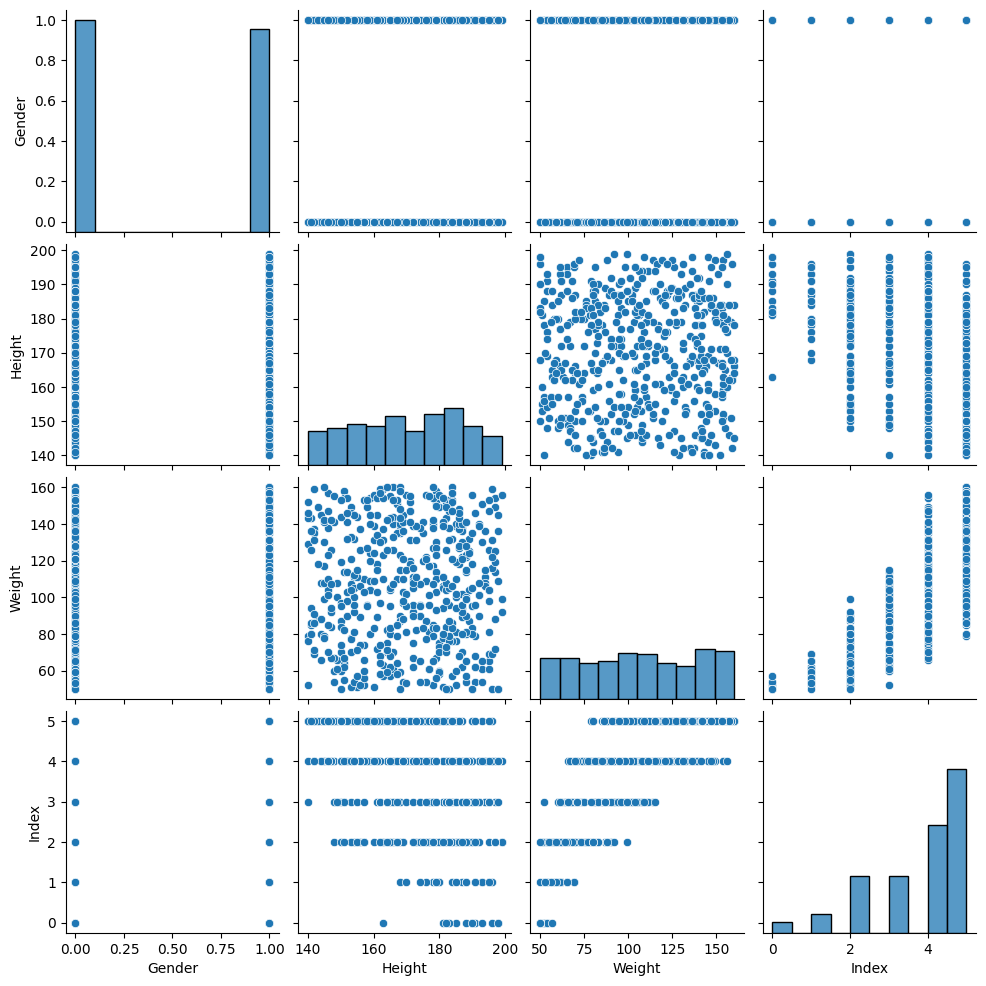

In [7]:
# plt.hist(Normalizer().fit_transform(np.column_stack([dataset["Height"],dataset["Weight"]])))
# plt.xlabel("Height")
# plt.ylabel("frequency")
# plt.show()
# x = dataset["Height"].to_numpy().reshape(-1,1)
# p = dataset["Weight"].to_numpy().reshape(-1,1)

# model = SVR(kernel="poly")
# model.fit(x,p)
# pred = model.predict(x)
# plt.scatter(dataset["Height"],dataset["Weight"], alpha= 0.7,cmap="magma")
# plt.plot(x,pred)
pairplot(dataset,hue="")



In [7]:

model = SVC(kernel="rbf",gamma=0.02)
print(cross_val_score(model,X_train,y_train))

[0.9    0.875  0.8875 0.9625 0.9125]


In [8]:
model.fit(X_train,y_train)
prediction = model.predict(X_test)
confusion = confusion_matrix(y_test,prediction)

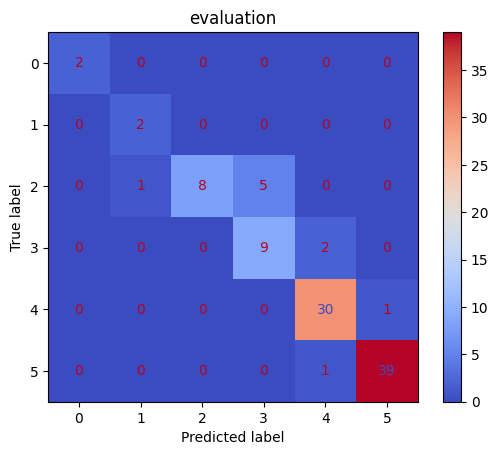

In [9]:
disp = ConfusionMatrixDisplay(confusion_matrix= confusion, display_labels=['0','1','2','3','4','5'])
disp.plot(cmap="coolwarm")
plt.title("evaluation")
plt.show()

In [14]:
print(f"accuracy: {accuracy_score(y_test,prediction)}")

with open("bmi.pkl","wb") as file:
    pickle.dump(model,file)
    

accuracy: 0.9
